In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Date'>

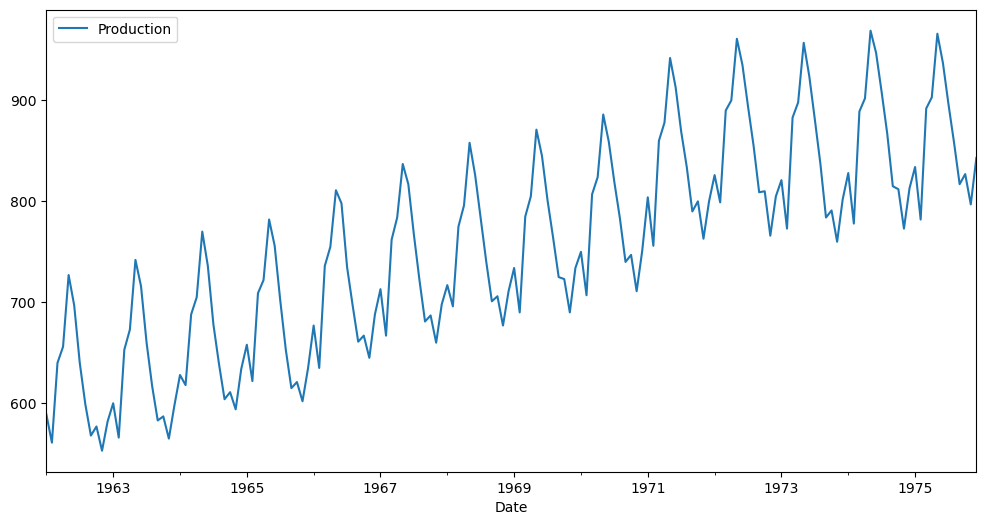

In [5]:
df.plot(figsize=(12,6))

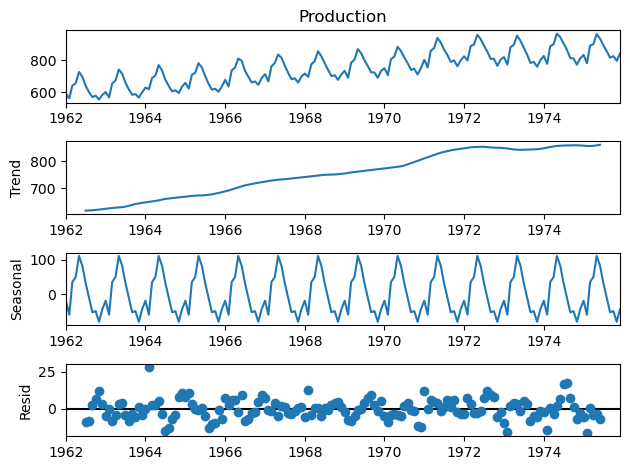

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot();

In [8]:
len(df)

168

In [9]:
train = df.iloc[:156]
test = df.iloc[156:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
X,y = generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.20913462 0.24759615 0.41826923]
Predict this y: 
 [[0.34615385]]


In [19]:
X.shape

(1, 3, 1)

In [65]:
# We do the same thing, but now instead for 12 months
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [77]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(64, activation='relu'))  # Remove input_shape here
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 12, 100)           40800     
                                                                 
 lstm_23 (LSTM)              (None, 64)                42240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 85153 (332.63 KB)
Trainable params: 85153 (332.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 7s 14ms/step - loss: 0.0559 - accuracy: 0.0069
Epoch 2/50
144/144 [==============================] - 2s 14ms/step - loss: 0.0296 - accuracy: 0.0069
Epoch 3/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0206 - accuracy: 0.0069
Epoch 4/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0134 - accuracy: 0.0069
Epoch 5/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0072 - accuracy: 0.0069
Epoch 6/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0073 - accuracy: 0.0069
Epoch 7/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0053 - accuracy: 0.0069
Epoch 8/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0044 - accuracy: 0.0069
Epoch 9/50
144/144 [==============================] - 2s 14ms/step - loss: 0.0034 - accuracy: 0.0069
Epoch 10/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0038 - accura

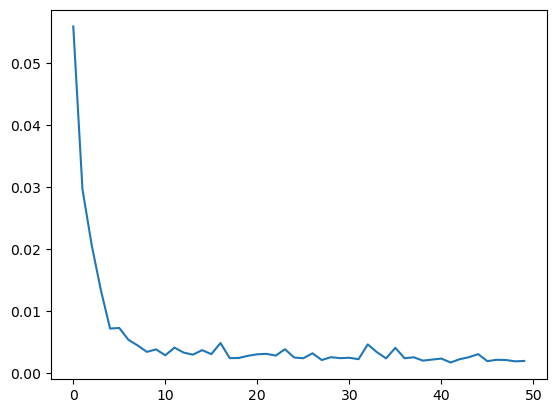

In [81]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [82]:
last_train_batch = scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [83]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [84]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 593ms/step


array([[0.68215346]], dtype=float32)

In [85]:
scaled_test[0]

array([0.67548077])

In [92]:
len(test)

12

In [98]:
first_eval_batch = scaled_train[-n_input:]

current_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch,current_batch

(array([[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]),
 array([[[0.66105769],
         [0.54086538],
         [0.80769231],
         [0.83894231],
         [1.        ],
         [0.94711538],
         [0.85336538],
         [0.75480769],
         [0.62980769],
         [0.62259615],
         [0.52884615],
         [0.625     ]]]))

In [93]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 30ms/step


In [87]:
test_predictions

[array([0.68215346], dtype=float32),
 array([0.6360476], dtype=float32),
 array([0.8303872], dtype=float32),
 array([0.885849], dtype=float32),
 array([0.9777572], dtype=float32),
 array([0.9620027], dtype=float32),
 array([0.8981869], dtype=float32),
 array([0.808937], dtype=float32),
 array([0.69785535], dtype=float32),
 array([0.66491544], dtype=float32),
 array([0.60028225], dtype=float32),
 array([0.6604789], dtype=float32)]

In [88]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,796.692251
1975-02-01,782,798.623749
1975-03-01,892,847.159937
1975-04-01,903,871.435879
1975-05-01,966,895.364658


In [89]:
true_predictions = scaler.inverse_transform(test_predictions)

In [90]:
test['Predictions'] = true_predictions

C:\Users\nimet\AppData\Local\Temp\ipykernel_18208\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

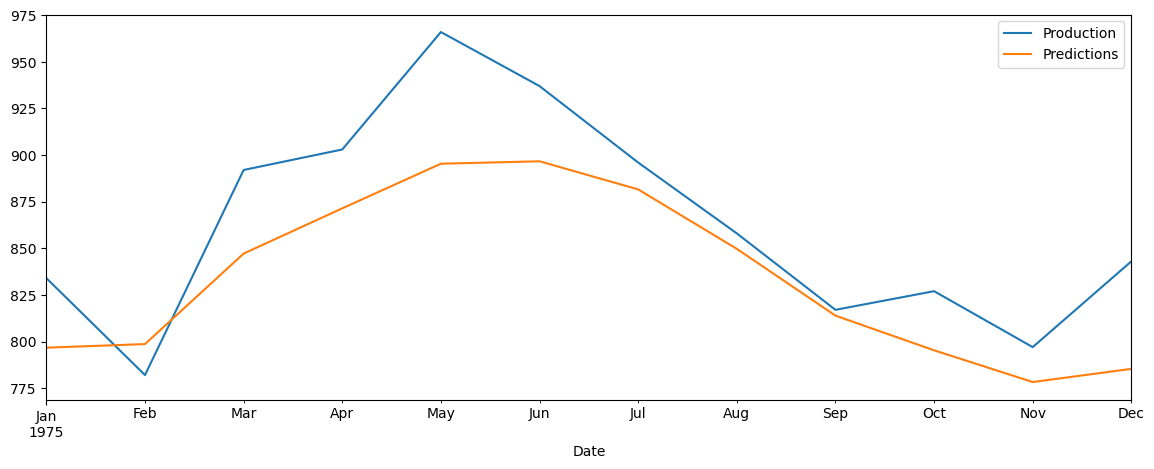

In [62]:
test.plot(figsize=(14,5))

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

36.810174449761405
